In [2]:
import pandas as pd
data_movies = pd.read_csv("imdb_project/movie_crawl.csv", sep=",")
data_movies

,title,original_title,movie_note,genre,date_pub,movie_runtime,public,synopsis,actors,orginal_language,country_of_origin
0,Les Évadés,Original title: The Shawshank Redemption,9.3,Drama,1994,"2, ,hours, ,22, ,minutes",Tous publics,Two imprisoned men bond over a number of years...,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",English,United States
1,Memento,NaN,8.4,"Mystery,Thriller",2000,"1, ,hour, ,53, ,minutes",Tous publics,A man with short-term memory loss attempts to ...,"Guy Pearce,Carrie-Anne Moss,Joe Pantoliano,Mar...",English,United States
2,Apocalypse Now,NaN,8.4,"Drama,Mystery,War",1979,"2, ,hours, ,27, ,minutes",Tous publics avec avertissement,A U.S. Army officer serving in Vietnam is task...,"Martin Sheen,Marlon Brando,Robert Duvall,Frede...","English,French,Vietnamese",United States
3,Alien - Le 8ème passager,Original title: Alien,8.4,"Horror,Sci-Fi",1979,"1, ,hour, ,57, ,minutes",12,After a space merchant vessel receives an unkn...,"Sigourney Weaver,Tom Skerritt,John Hurt,Veroni...",English,"United Kingdom,United States"
4,Cinéma Paradiso,Original title: Nuovo Cinema Paradiso,8.5,"Drama,Romance",1988,"2, ,hours, ,35, ,minutes",Tous publics,A filmmaker recalls his childhood when falling...,"Philippe Noiret,Enzo Cannavale,Antonella Attil...",Italian,"Italy,France"
...,...,...,...,...,...,...,...,...,...,...,...
245,Pulp Fiction,NaN,8.9,"Crime,Drama",1994,"2, ,hours, ,34, ,minutes",12,"The lives of two mob hitmen, a boxer, a gangst...","John Travolta,Uma Thurman,Samuel L. Jackson,Br...","English,Spanish,French",United States
246,12 Hommes en colère,Original title: 12 Angry Men,9.0,"Crime,Drama",1957,"1, ,hour, ,36, ,minutes",Tous publics,The jury in a New York City murder trial is fr...,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",English,United States
247,The Dark Knight : Le Chevalier noir,Original title: The Dark Knight,9.0,"Action,Crime,Drama,Thriller",2008,"2, ,hours, ,32, ,minutes",Tous publics,When the menace known as the Joker wreaks havo...,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...","English,Mandarin","United States,United Kingdom"
248,"Le Parrain, 2ᵉ partie",Original title: The Godfather: Part II,9.0,"Crime,Drama",1974,"3, ,hours, ,22, ,minutes",13,The early life and career of Vito Corleone in ...,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...","English,Italian,Spanish,Latin,Sicilian",United States


In [163]:
pd.unique(data_movies["actors"].str.split(",").explode("actors"))

array(['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', ..., 'Gianni Russo',
       'Al Martino', 'Lenny Montana'], dtype=object)

In [164]:
pd.unique(data_movies["genre"].str.split(",").explode("genre"))

array(['Drama', 'Mystery', 'Thriller', 'War', 'Horror', 'Sci-Fi',
       'Romance', 'Western', 'Biography', 'Comedy', 'Action', 'Adventure',
       'Crime', 'Music', 'Animation', 'Family', 'Fantasy', 'History',
       'Sport', 'Film-Noir', 'Musical'], dtype=object)

In [16]:
lang_list = pd.unique(data_movies["orginal_language"].str.split(",").explode("orginal_language"))
mask = pd.Series(True, index=data_movies.index)
for i in lang_list:
    mask_1 = data_movies['orginal_language'].str.contains(i)
mask_1

0      False
1      False
2      False
3      False
4      False
       ...  
245    False
246    False
247    False
248     True
249    False
Name: orginal_language, Length: 250, dtype: bool

In [19]:
data_movies["movie_note"].round(decimals=2)

0      9.3
1      8.4
2      8.4
3      8.4
4      8.5
      ... 
245    8.9
246    9.0
247    9.0
248    9.0
249    9.2
Name: movie_note, Length: 250, dtype: float64

In [3]:
pip install missingno

  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached tomli-1.2.2-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import missingno

<AxesSubplot:>

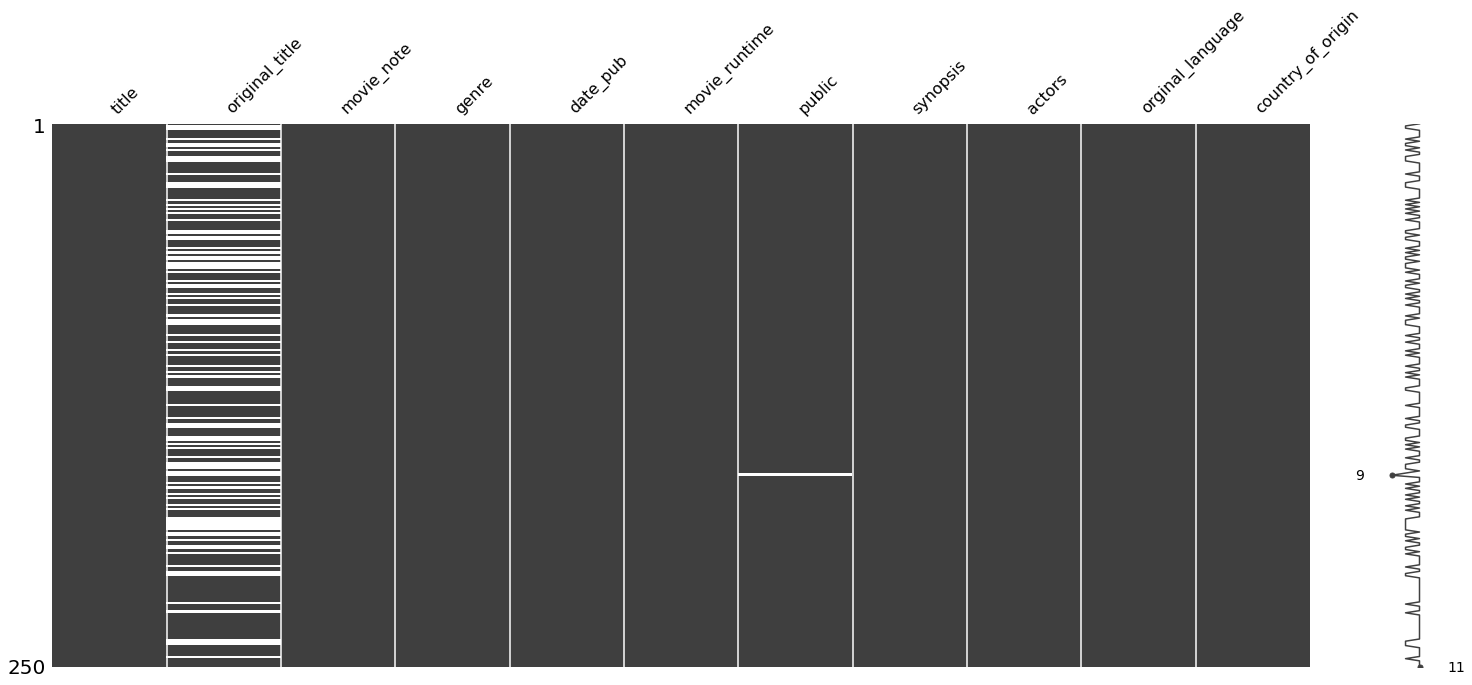

In [62]:
missingno.matrix(data_movies)

In [254]:
import re
a= data_movies["movie_runtime"].str.replace(",","")
a= a.str.replace(" ","")
#hour= a.str.split(" ").str.get(0).values
#minutes= a.str.split(" ").str.get(2)
a
#re.search("\d", a)
data_movies["movie_runtime"].str.replace(",","")
#a.apply(lambda x: int(x[0])*60 + int(x[2]))

0      2 hours 22 minutes
1       1 hour 53 minutes
2      2 hours 27 minutes
3       1 hour 57 minutes
4      2 hours 35 minutes
              ...        
245    2 hours 34 minutes
246     1 hour 36 minutes
247    2 hours 32 minutes
248    3 hours 22 minutes
249    2 hours 55 minutes
Name: movie_runtime, Length: 250, dtype: object

In [255]:
hour= a.str.extract(r'(\d+)h')
minutes = a.str.extract(r'(\d+)m')

<AxesSubplot:>

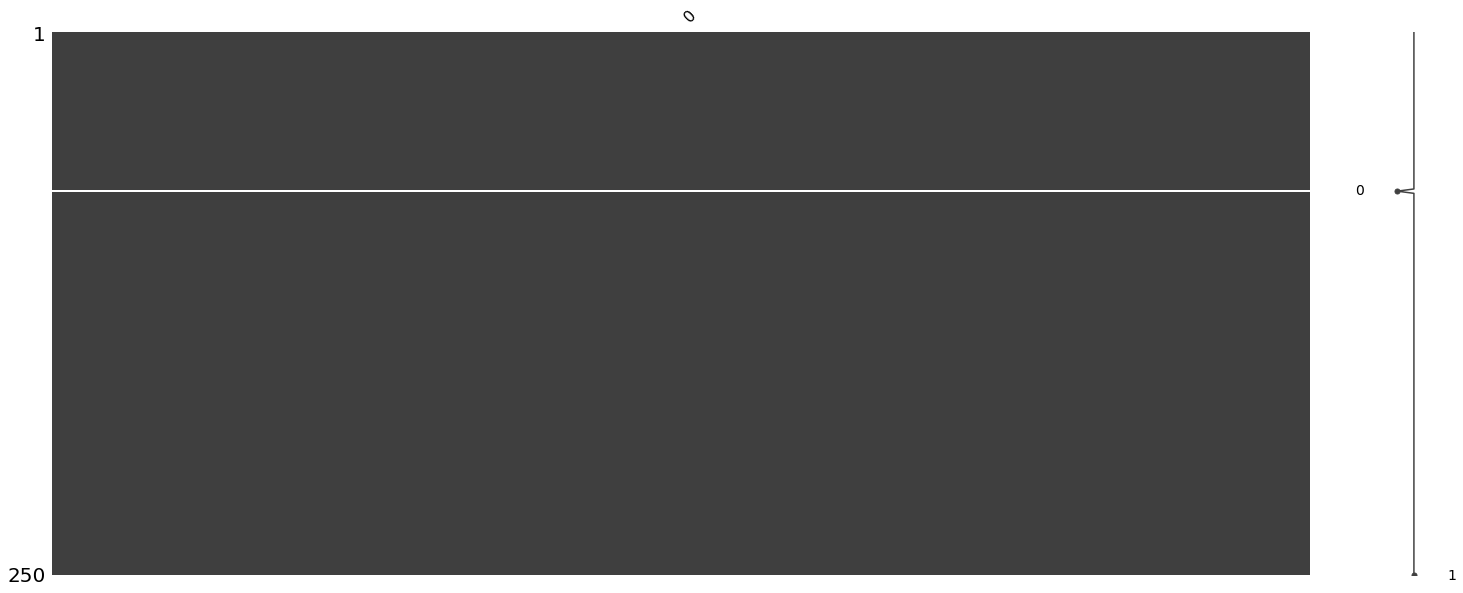

In [256]:
hour= hour.astype("float")
minutes= minutes.astype("float")
missingno.matrix(minutes)

In [257]:
hour = hour[0].fillna(0.0)
minutes = minutes[0].fillna(0.0)
duration = hour * 60 + minutes
type(duration)

pandas.core.series.Series

<AxesSubplot:>

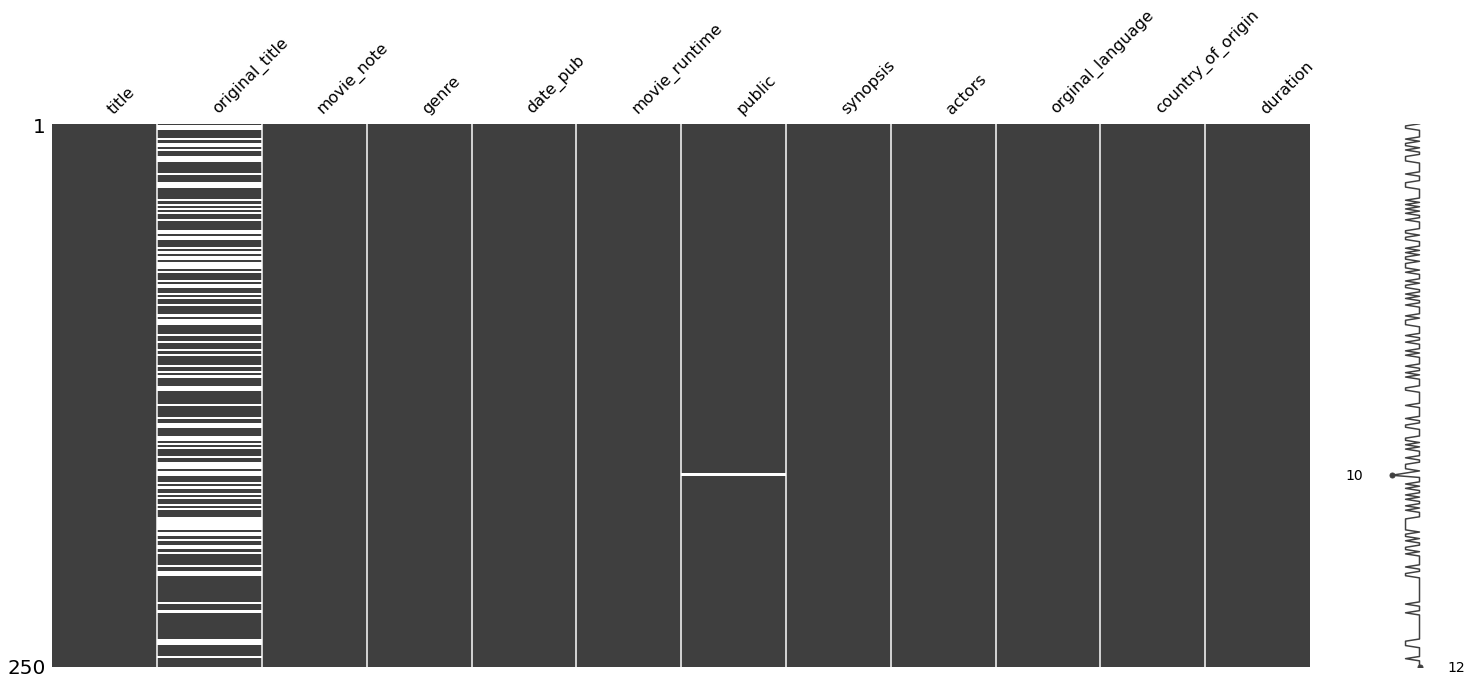

In [259]:
data_movies["duration"] = duration
missingno.matrix(data_movies)

In [238]:
for i in range(len(hour[0])):
    
    print(type(hour[0][i]))
#     if type(hour[0][i]) != float:
#         hour[0][i] = 0.0
#hour[0].unique()
#minutes[0].unique()

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

In [124]:
#data_movies.merge(duration, left_index=True, right_index=True)
data_movies["duration"] = hour * 60 + minutes
#Quel est le film le plus long ?
longest_movie = data_movies.sort_values(by=["duration"], ascending=False).head(1)

In [123]:
#Quels sont les 5 films les mieux notés ? 
best_five = data_movies.sort_values(by=["movie_note"], ascending=False).head(5)

In [110]:
#Dans combien de films a joué Morgan Freeman ? 
morgan_freeman= data_movies[data_movies["actors"].str.contains('Morgan\sFreeman', regex=True)]
#Tom Cruise ?
tom_cruise= data_movies[data_movies["actors"].str.contains('Tom\sCruise', regex=True)]

In [122]:
#Quels sont les 3 meilleurs films d’horreur ? 
horror = data_movies[data_movies["genre"].str.contains('Horror')].sort_values(by=["movie_note"], ascending=False).head(3)
#Dramatique ? 
drama = data_movies[data_movies["genre"].str.contains('Drama')].sort_values(by=["movie_note"], ascending=False).head(3)
#Comique ? 
comedy = data_movies[data_movies["genre"].str.contains('Comedy')].sort_values(by=["movie_note"], ascending=False).head(3)

In [135]:
#Parmi les 100 films les mieux notés, quel pourcentage sont américains ?
movies_100= data_movies.sort_values(by=["movie_note"], ascending=False).head(100)
us_movies_pct = len(movies_100[movies_100["country_of_origin"].str.contains('United\sStates')])
#Français ? 
fr_movies_pct= len(movies_100[movies_100["country_of_origin"].str.contains('France')])

In [140]:
#Quel est la durée moyenne d’un film en fonction du genre ? 
#Action
action_avg= data_movies[data_movies["genre"].str.contains('Action')]
action_avg["duration"].mean()
#Adventure
adventure_avg= data_movies[data_movies["genre"].str.contains('Adventure')]
adventure_avg["duration"].mean()
#Animation
animation_avg= data_movies[data_movies["genre"].str.contains('Animation')]
animation_avg["duration"].mean()
#Biography
biography_avg= data_movies[data_movies["genre"].str.contains('Biography')]
biography_avg["duration"].mean()
#Comedy
comedy_avg= data_movies[data_movies["genre"].str.contains('Comedy')]
comedy_avg["duration"].mean()
#Crime
crime_avg= data_movies[data_movies["genre"].str.contains('Crime')]
crime_avg["duration"].mean()
#Drama
drama_avg= data_movies[data_movies["genre"].str.contains('Drama')]
drama_avg["duration"].mean()
#Family
family_avg= data_movies[data_movies["genre"].str.contains('Family')]
family_avg["duration"].mean()
#Fantasy
fantasy_avg= data_movies[data_movies["genre"].str.contains('Fantasy')]
fantasy_avg["duration"].mean()
#Film-Noir
film_noir_avg= data_movies[data_movies["genre"].str.contains('Film-Noir')]
film_noir_avg["duration"].mean()
#History
history_avg= data_movies[data_movies["genre"].str.contains('History')]
history_avg["duration"].mean()
#Horror
horror_avg= data_movies[data_movies["genre"].str.contains('Horror')]
horro_avg["duration"].mean()
#Music
music_avg= data_movies[data_movies["genre"].str.contains('Music')]
music_avg["duration"].mean()
#Musical
musical_avg= data_movies[data_movies["genre"].str.contains('Musical')]
musical_avg["duration"].mean()
#Mystery
mystery_avg= data_movies[data_movies["genre"].str.contains('Mystery')]
mystery_avg["duration"].mean()
#Romance
romance_avg= data_movies[data_movies["genre"].str.contains('Romance')]
romance_avg["duration"].mean()
#Sci-Fi
sci_fi_avg= data_movies[data_movies["genre"].str.contains('Sci-Fi')]
sci_fi_avg["duration"].mean()
#Sport
sport_avg= data_movies[data_movies["genre"].str.contains('Sport')]
sport_avg["duration"].mean()
#Thriller
thriller_avg= data_movies[data_movies["genre"].str.contains('Thriller')]
thriller_avg["duration"].mean()
#War
war_avg= data_movies[data_movies["genre"].str.contains('War')]
war_avg["duration"].mean()
#Western
western_avg= data_movies[data_movies["genre"].str.contains('Western')]
western_avg["duration"].mean()

In [141]:
film_noir_avg["duration"].mean()

107.0